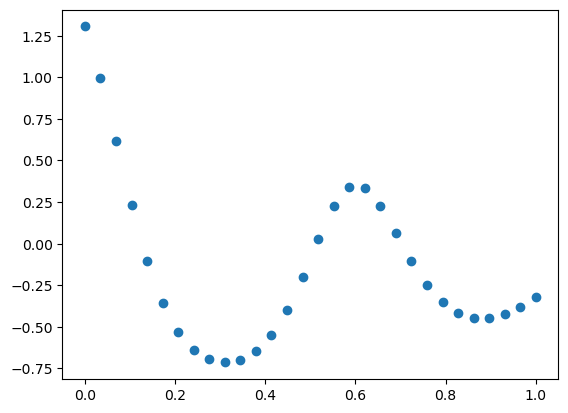

In [2]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
from known_boundary.SLogGP import SLogGP

np.random.seed(0)


X_init = np.array([0.0]).reshape(-1,1)
Y_init = np.array([0.0]).reshape(-1,1)

kernel = GPy.kern.RBF(input_dim=1,lengthscale= 0.2,variance=0.5)  #np.sqrt(res[0])
model_test = GPy.models.GPRegression(X_init, Y_init,kernel)

X_test = np.linspace(0,1,30).reshape(-1,1)
Y_test = np.exp(0.5+model_test.posterior_samples_f(X_test,size=1).reshape(-1,1))-1

plt.scatter(X_test,Y_test)

In [8]:
lower = -np.min(Y_test)+10**(-6)
upper = lower+5

m = GPy.models.WarpedGP(X_test, Y_test,warping_function=SLogGP(lower=lower,upper=upper,n_terms =1))
m.rbf.lengthscale.constrain_bounded(0.01,10)
m.rbf.variance.constrain_bounded(0.01**2,10)
m.Gaussian_noise.fix(1e-6)
parameter_num = 3

for i in range(parameter_num**3):
    try:
        np.random.seed(i)
        m.optimize()
    except:
        print('oh')
        pass

reconstraining parameters gp.rbf.lengthscale
reconstraining parameters gp.rbf.variance


In [5]:
m

gp.,value,constraints,priors
rbf.variance,1.3134625796354569,"0.0001,10.0",
rbf.lengthscale,0.23025187379070672,"0.01,10.0",
Gaussian_noise.variance,1e-06,+ve fixed,
SlogGP.psi,[0.99096939],"0.7138615543306269,5.713861554330627",
